In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [47]:
# Memuat dataset
df = pd.read_csv("DampakBencanaFinal.csv", delimiter=";")

In [48]:
df.head()

,No.,Wilayah,Jumlah Kejadian,Meninggal,Terluka,Menderita,Mengungsi,Rusak Berat,Rusak Sedang,Rusak Ringan,Terendam
0,1,Aceh,945,150,1393,738705,580495,1317758,985941,1122634,776703
1,2,Sumatera Utara,469,64,112,288564,1152879,1510,1477,1357687,752181
2,3,Sumatera Barat,570,15,35,1300706,1334,143,186,420,550313
3,4,Riau,229,12,36,1597291,31345,398,769,1273106,244662
4,5,Jambi,226,5,13,541614,135115,473,467,1147,92749


# Exploratory Data Analysis

In [49]:
# Buatkan EDA dan berikan deskripsinya :
# 2 line plot
# 2 box plot
# 2 pie chart
# scatter plot
# corelation matrix

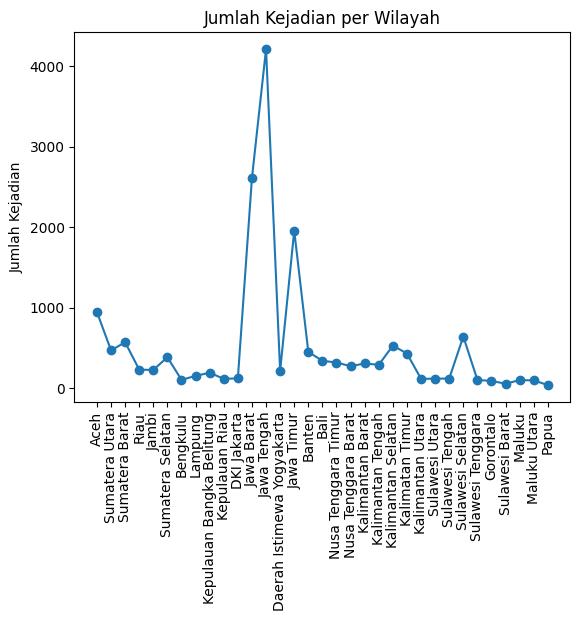

In [50]:
# Line Plot Jumlah Kejadian per Wilayah
plt.figure()
plt.plot(df["Wilayah"], df["Jumlah Kejadian"], marker='o')
plt.xticks(rotation=90)
plt.title("Jumlah Kejadian per Wilayah")
plt.ylabel("Jumlah Kejadian")
plt.show()


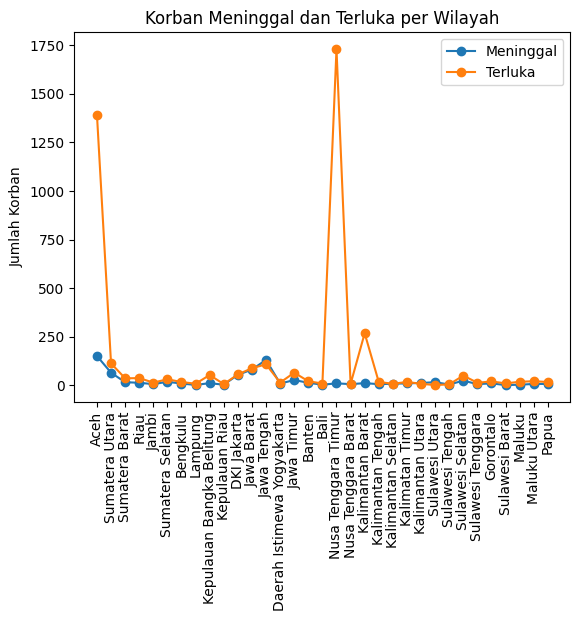

In [51]:
# Line Plot Korban Meninggal dan Terluka per Wilayah
plt.figure()
plt.plot(df["Wilayah"], df["Meninggal"], marker='o', label="Meninggal")
plt.plot(df["Wilayah"], df["Terluka"], marker='o', label="Terluka")
plt.xticks(rotation=90)
plt.title("Korban Meninggal dan Terluka per Wilayah")
plt.ylabel("Jumlah Korban")
plt.legend()
plt.show()

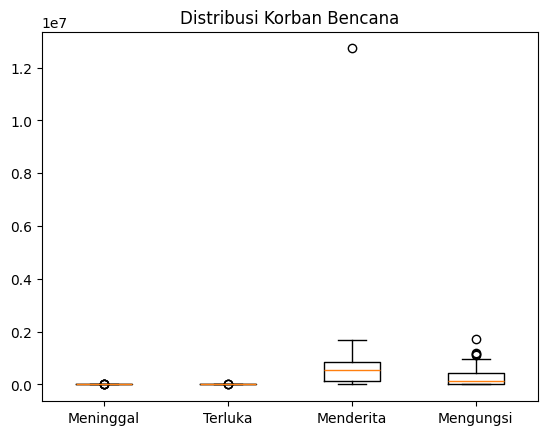

In [52]:
# Boxplot Distribusi Korban Bencana
plt.figure()
plt.boxplot([
    df["Meninggal"],
    df["Terluka"],
    df["Menderita"],
    df["Mengungsi"]
])
plt.xticks([1,2,3,4], ["Meninggal", "Terluka", "Menderita", "Mengungsi"])
plt.title("Distribusi Korban Bencana")
plt.show()

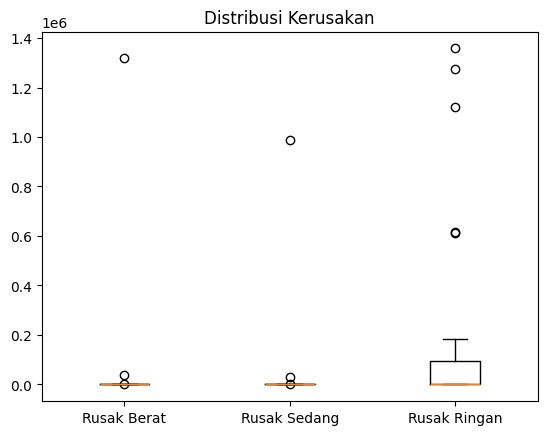

In [53]:
# Boxplot Distribusi Kerusakan
plt.figure()
plt.boxplot([
    df["Rusak Berat"],
    df["Rusak Sedang"],
    df["Rusak Ringan"]
])
plt.xticks([1,2,3], ["Rusak Berat", "Rusak Sedang", "Rusak Ringan"])
plt.title("Distribusi Kerusakan")
plt.show()

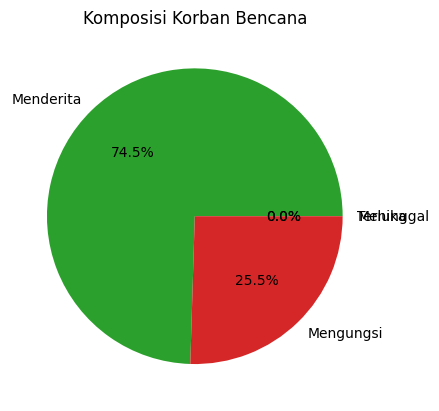

In [54]:
# Pie Chart Komposisi Korban Bencana
korban = [
    df["Meninggal"].sum(),
    df["Terluka"].sum(),
    df["Menderita"].sum(),
    df["Mengungsi"].sum()
]

label_korban = ["Meninggal", "Terluka", "Menderita", "Mengungsi"]

plt.figure()
plt.pie(korban, labels=label_korban, autopct='%1.1f%%')
plt.title("Komposisi Korban Bencana")
plt.show()

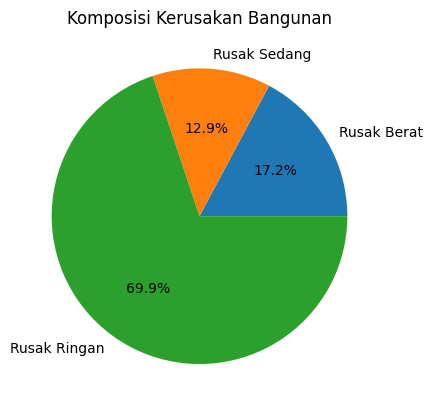

In [ ]:
# Pie Chart Komposisi Kerusakan Bangunan
kerusakan = [
    df["Rusak Berat"].sum(),
    df["Rusak Sedang"].sum(),
    df["Rusak Ringan"].sum()
]

label_rusak = ["Rusak Berat", "Rusak Sedang", "Rusak Ringan"]

plt.figure()
plt.pie(kerusakan, labels=label_rusak, autopct='%1.1f%%')
plt.title("Komposisi Kerusakan Bangunan")
plt.show()

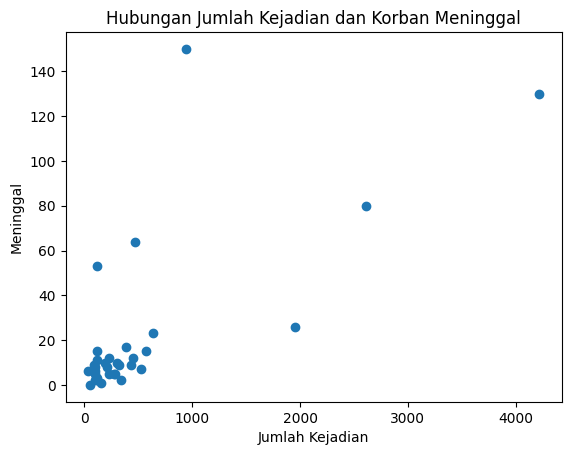

In [55]:
# Scatter Plot Hubungan Jumlah Kejadian dan Korban Meninggal
plt.figure()
plt.scatter(df["Jumlah Kejadian"], df["Meninggal"])
plt.xlabel("Jumlah Kejadian")
plt.ylabel("Meninggal")
plt.title("Hubungan Jumlah Kejadian dan Korban Meninggal")
plt.show()

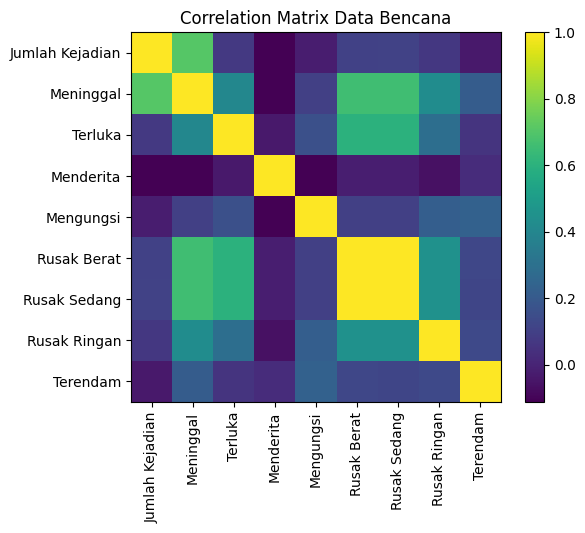

In [56]:
# Correlation Matrix Data Bencana
kolom_numerik = [
    "Jumlah Kejadian", "Meninggal", "Terluka", "Menderita", "Mengungsi",
    "Rusak Berat", "Rusak Sedang", "Rusak Ringan", "Terendam"
]

corr = df[kolom_numerik].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(kolom_numerik)), kolom_numerik, rotation=90)
plt.yticks(range(len(kolom_numerik)), kolom_numerik)
plt.title("Correlation Matrix Data Bencana")
plt.show()

In [57]:
columns_to_convert = ['Jumlah Kejadian', 'Meninggal', 'Terluka', 'Menderita', 'Mengungsi', 'Rusak Berat', 'Rusak Sedang', 'Rusak Ringan', 'Terendam']
for cols in columns_to_convert:
    df[cols] = df[cols].astype(str).str.replace(',', '.', regex=False)
    df[cols] = pd.to_numeric(df[cols], errors='coerce')


In [58]:
# Memilih Fitur Sesuai Dataset DampakBencanaFinal.csv
features = ['Jumlah Kejadian',
            'Meninggal',
            'Terluka',
            'Menderita',
            'Mengungsi',
            'Rusak Berat',
            'Rusak Sedang',
            'Rusak Ringan',
            'Terendam']

In [59]:
# Standarisasi Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Modeling

In [60]:
# Menentukan jumlah cluster menggunakan metode elbow
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

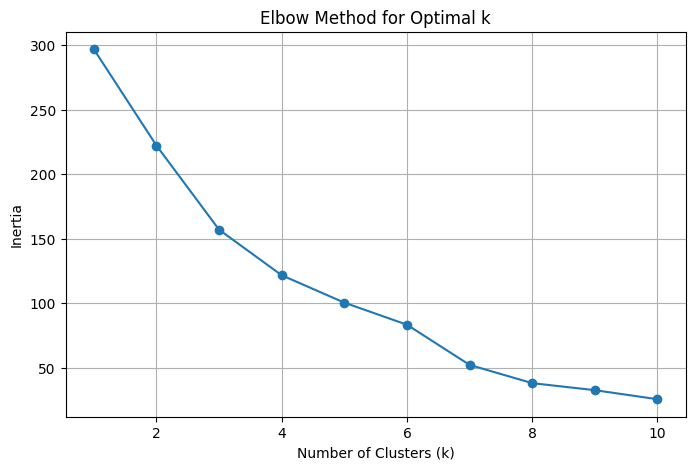

In [61]:
# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [62]:
# Menggunakan jumlah cluster optimal
optimal_k = 4 # Berdasarkan elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluasi

In [63]:
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.4f}")

Silhouette Score untuk k=4: 0.3375


In [64]:
print("\nRingkasan Profil Kluster (Rata-rata Nilai Fitur):")
kluster_summary = df.groupby('Cluster')[features].mean()
kluster_summary['Jumlah Wilayah'] = df.groupby('Cluster').size()
print(kluster_summary.round(2))

print("\nDetail Wilayah per Kluster:")
for i in range(optimal_k):
    print(f"\nKluster {i}:")
    print(df[df['Cluster'] == i]['Wilayah'].tolist())


Ringkasan Profil Kluster (Rata-rata Nilai Fitur):
         Jumlah Kejadian  Meninggal  Terluka   Menderita  Mengungsi  \
Cluster                                                               
0                3414.50     105.00    97.00   239504.00   72151.00   
1                 282.43       7.76    16.29  1231264.33  106239.81   
2                 945.00     150.00  1393.00   738705.00  580495.00   
3                 355.44      21.89   257.78   515285.89  876918.78   

         Rusak Berat  Rusak Sedang  Rusak Ringan   Terendam  Jumlah Wilayah  
Cluster                                                                      
0           19821.00      16427.50     138435.50  370445.00               2  
1             205.76        227.52      96969.48  306857.57              21  
2         1317758.00     985941.00    1122634.00  776703.00               1  
3             418.89        404.78     234460.89  843343.00               9  

Detail Wilayah per Kluster:

Kluster 0:
['Jawa Barat'

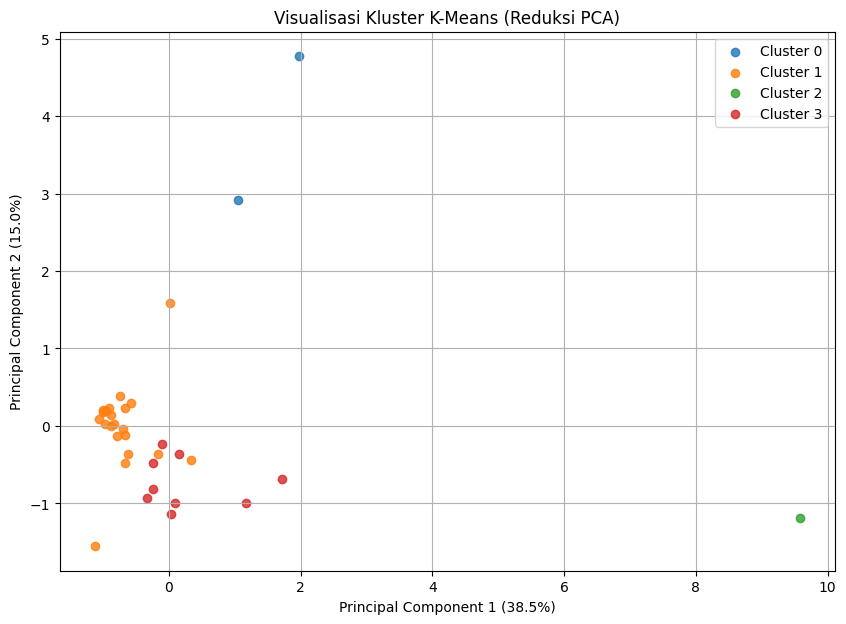

In [65]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(10, 7))
for i in range(optimal_k):
    subset = pca_df[pca_df['Cluster'] == i]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {i}', alpha=0.8)

plt.title('Visualisasi Kluster K-Means (Reduksi PCA)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend()
plt.grid()
plt.show()